In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
database = pd.read_csv('database.csv')
database.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,79,oral_cavity_cancer,12.259970,7.822784,7.076852,9.932529,6.079321,8.884615,7.078590,6.375017,...,14.097388,13.808292,14.879530,14.770789,6.277723,5.492216,4.872947,4.504117,5.058785,4.959956
1,80,oral_cavity_cancer,12.089249,7.754616,7.640473,10.528756,5.600609,9.038594,7.191701,6.505015,...,14.150997,13.975202,14.868461,14.710410,6.056832,5.809288,4.551575,4.536802,5.166772,5.218432
2,81,oral_cavity_cancer,12.253493,8.331198,6.980443,9.786068,5.357674,7.671959,6.878982,6.686758,...,13.171790,12.663488,14.375815,14.229668,5.902731,5.552099,4.660518,4.428401,4.990019,4.845970
3,82,oral_cavity_cancer,12.784522,8.175401,7.303593,9.868314,5.524533,7.802572,6.849571,6.628684,...,13.348310,12.854595,14.562390,14.354983,5.964846,5.588120,4.667251,4.555028,5.090857,4.773182
4,83,oral_cavity_cancer,12.594939,7.766172,8.706035,9.887563,5.529864,8.735436,6.943179,6.550663,...,13.820435,13.565086,14.817541,14.686170,5.594160,5.640937,4.492807,4.503870,4.920595,4.946553


In [3]:
database.shape

(103, 54677)

In [4]:
# split the data into train and test
database = database.drop('samples', axis=1)
X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# KNN - k-nearest neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
predictions = knn_classifier.predict(X_test)
predictions

array(['oral_cavity_cancer', 'oral_cavity_cancer', 'normal', 'normal',
       'oral_cavity_cancer', 'normal', 'oral_cavity_cancer', 'normal',
       'normal', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'normal', 'normal', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'normal',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'oral_cavity_cancer', 'normal', 'oral_cavity_cancer', 'normal',
       'oral_cavity_cancer', 'oral_cavity_cancer', 'oral_cavity_cancer',
       'normal', 'normal', 'oral_cavity_cancer'], dtype=object)

In [8]:
y_test

21    oral_cavity_cancer
57    oral_cavity_cancer
89                normal
95                normal
36    oral_cavity_cancer
62    oral_cavity_cancer
25    oral_cavity_cancer
50    oral_cavity_cancer
98                normal
43    oral_cavity_cancer
35    oral_cavity_cancer
54    oral_cavity_cancer
28    oral_cavity_cancer
75                normal
37    oral_cavity_cancer
26    oral_cavity_cancer
32    oral_cavity_cancer
74                normal
5     oral_cavity_cancer
68    oral_cavity_cancer
11    oral_cavity_cancer
64    oral_cavity_cancer
85                normal
84                normal
80                normal
29    oral_cavity_cancer
22    oral_cavity_cancer
23    oral_cavity_cancer
99                normal
88                normal
20    oral_cavity_cancer
Name: type, dtype: object

In [9]:
from sklearn.metrics import accuracy_score, classification_report

In [10]:
accuracy_score(y_test, predictions)

0.8709677419354839

/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8709677419354839

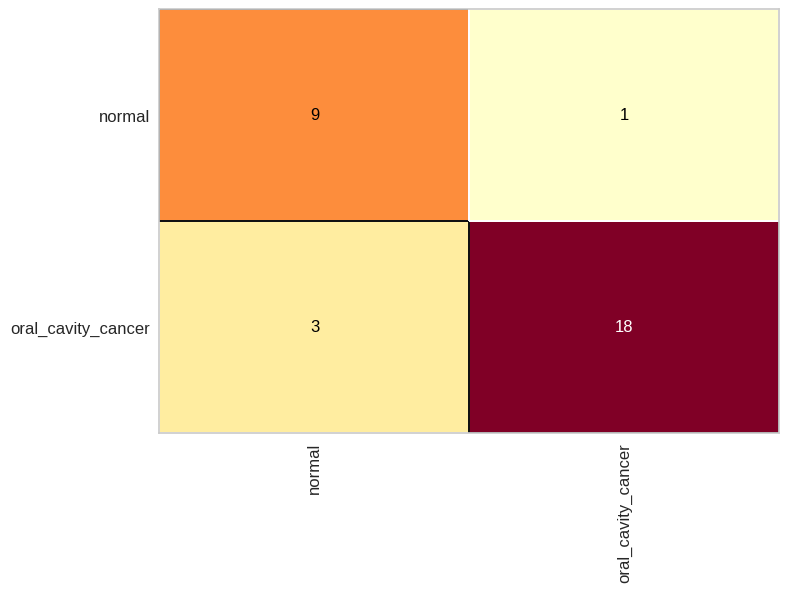

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train) 
cm.score(X_test, y_test)

In [12]:
print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

            normal       0.75      0.90      0.82        10
oral_cavity_cancer       0.95      0.86      0.90        21

          accuracy                           0.87        31
         macro avg       0.85      0.88      0.86        31
      weighted avg       0.88      0.87      0.87        31

